In [242]:
# Done by: Ajay Sah (24172531), Pallavi Ghimire (23221174), Rachana Kafle (23159096)
import sys
sys.path.append('../')
from src.finance_ml.indicators.indicators import Indicators
from src.finance_ml.data_preparation.data_preparation import DataLoader

from IPython.display import display

In [243]:
dataloader = DataLoader(time_index_col= 'DATE',
                    keep_cols = ['VOLUME','OPEN', 'HIGHT', 'LOW', 'CLOSE', 'VW','TRANSACTIONS'])
ticker = 'FB'
fname_FB = 'equities/FB_2020-04-07_2022-04-06.parquet'
fname = fname_FB
N = 200
df = dataloader.load_dataset({ticker:'../data/'+fname}).iloc[:N]
display(df)

,FB_VOLUME,FB_OPEN,FB_HIGHT,FB_LOW,FB_CLOSE,FB_VW,FB_TRANSACTIONS
DATE,,,,,,,
2020-04-07 15:41:00,49517.0,169.7050,169.8200,169.5811,169.700,169.7005,450
2020-04-07 15:42:00,38624.0,169.6700,169.8105,169.6200,169.740,169.7052,456
2020-04-07 15:43:00,24795.0,169.7200,169.8050,169.5700,169.570,169.6920,348
2020-04-07 15:44:00,33196.0,169.5500,169.5500,169.3900,169.410,169.4669,433
2020-04-07 15:45:00,67190.0,169.3900,169.4800,168.9700,169.050,169.2253,650
...,...,...,...,...,...,...,...
2020-04-07 18:56:00,103549.0,167.7200,168.1800,167.7100,168.170,167.9256,524
2020-04-07 18:57:00,44672.0,168.1610,168.3300,168.1610,168.190,168.2474,426
2020-04-07 18:58:00,33642.0,168.2027,168.2300,168.0000,168.065,168.0721,399


In [244]:
# Columns of indicators with default parameters
data_cols = ['DATE', 'OPEN', 'HIGHT', 'LOW', 'CLOSE', 'VW', 'VOLUME']

var_cols = ['OPEN', 'HIGHT', 'LOW', 'CLOSE', 'VW', 'VOLUME','CMF_w20', 'ADI', 'OBV', 'TRANSACTIONS']

# For each of calculated column, we add the ticker code, as standardized by class 𝙳𝚊𝚝𝚊𝙻𝚘𝚊𝚍𝚎𝚛
var_cols = [ticker+'_'+col for col in var_cols]
norm_cols = [col + '_norm' for col in var_cols]

In [245]:
# Process data normalization
norm_data = True

# Select Indicator transformer
ind_processor = Indicators(ticker = ticker, norm_data = norm_data, calc_all=False, list_ind=['CMF', 'ADI', 'OBV'])

# Calculate Indicators over input dataframe
df = ind_processor.fit_transform(df)

if norm_data:
    df_norm = ind_processor.data_norm

In [246]:
# Display dataframe with Indicators
display(df[var_cols].dropna(axis=0))

,FB_OPEN,FB_HIGHT,FB_LOW,FB_CLOSE,FB_VW,FB_VOLUME,FB_CMF_w20,FB_ADI,FB_OBV,FB_TRANSACTIONS
DATE,,,,,,,,,,
2020-04-07 16:00:00,169.6800,170.0000,169.660,170.000,169.8334,56620.0,0.049135,40292.039648,241352.0,499
2020-04-07 16:01:00,169.9700,169.9800,169.790,169.980,169.8971,29244.0,0.087232,69536.039648,212108.0,300
2020-04-07 16:02:00,169.9800,170.1000,169.915,170.100,169.9995,74325.0,0.160456,143861.039648,286433.0,693
2020-04-07 16:03:00,170.0936,170.1100,169.950,170.010,170.0308,45997.0,0.172005,132361.789648,240436.0,397
2020-04-07 16:04:00,170.0100,170.1894,170.010,170.100,170.1170,34779.0,0.200833,132478.107374,275215.0,456
...,...,...,...,...,...,...,...,...,...,...
2020-04-07 18:56:00,167.7200,168.1800,167.710,168.170,167.9256,103549.0,0.137622,435713.429377,601047.0,524
2020-04-07 18:57:00,168.1610,168.3300,168.161,168.190,168.2474,44672.0,0.138208,406372.648312,645719.0,426
2020-04-07 18:58:00,168.2027,168.2300,168.000,168.065,168.0721,33642.0,0.136790,391745.691791,612077.0,399


In [247]:
if (norm_data):
    display(df_norm[norm_cols].dropna(axis=0))

,FB_OPEN_norm,FB_HIGHT_norm,FB_LOW_norm,FB_CLOSE_norm,FB_VW_norm,FB_VOLUME_norm,FB_CMF_w20_norm,FB_ADI_norm,FB_OBV_norm,FB_TRANSACTIONS_norm
DATE,,,,,,,,,,
2020-04-07 16:00:00,-0.077258,0.010302,-0.019780,0.062024,-0.006421,-0.639752,0.145800,-0.664710,-0.550317,-0.423221
2020-04-07 16:01:00,0.048966,0.001305,0.037363,0.053319,0.022182,-0.878580,0.228965,-0.604232,-0.597554,-0.795880
2020-04-07 16:02:00,0.053319,0.055288,0.092308,0.105550,0.068163,-0.485294,0.388809,-0.450527,-0.477498,-0.059925
2020-04-07 16:03:00,0.102764,0.059787,0.107692,0.066376,0.082218,-0.732427,0.414021,-0.474308,-0.551796,-0.614232
2020-04-07 16:04:00,0.066376,0.095506,0.134066,0.105550,0.120925,-0.830292,0.476951,-0.474067,-0.495618,-0.503745
...,...,...,...,...,...,...,...,...,...,...
2020-04-07 18:56:00,-0.930359,-0.808448,-0.876923,-0.734494,-0.863089,-0.230344,0.338965,0.153030,0.030695,-0.376404
2020-04-07 18:57:00,-0.738411,-0.740969,-0.678681,-0.725789,-0.718590,-0.743986,0.340243,0.092353,0.102853,-0.559925
2020-04-07 18:58:00,-0.720261,-0.785955,-0.749451,-0.780196,-0.797306,-0.840211,0.337149,0.062104,0.048511,-0.610487


<AxesSubplot: xlabel='DATE'>

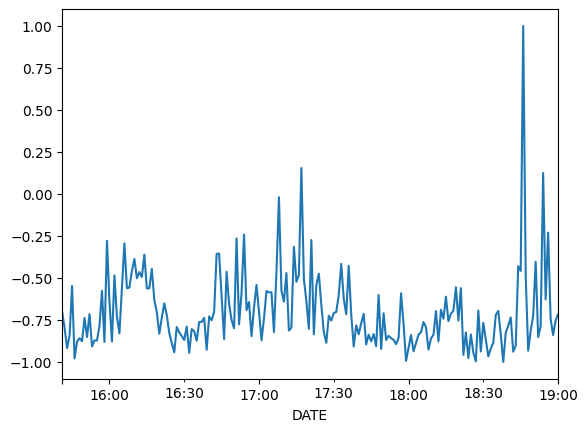

In [252]:
# Plot the volume chart
df_volume = df_norm.FB_VOLUME_norm
df_volume.plot(kind="line")

<AxesSubplot: xlabel='DATE'>

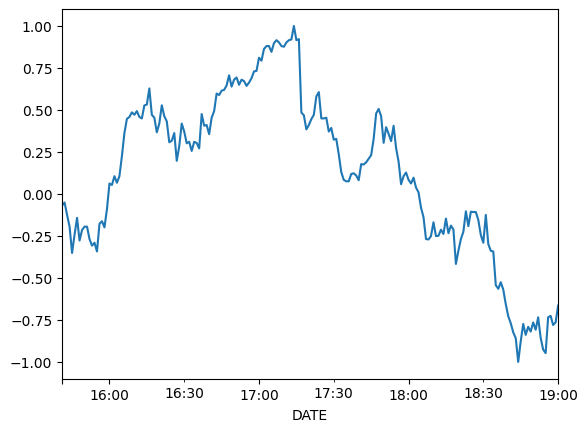

In [256]:
# Plot the close chart
df_close = df_norm.FB_CLOSE_norm
df_close.plot()

<AxesSubplot: xlabel='DATE'>

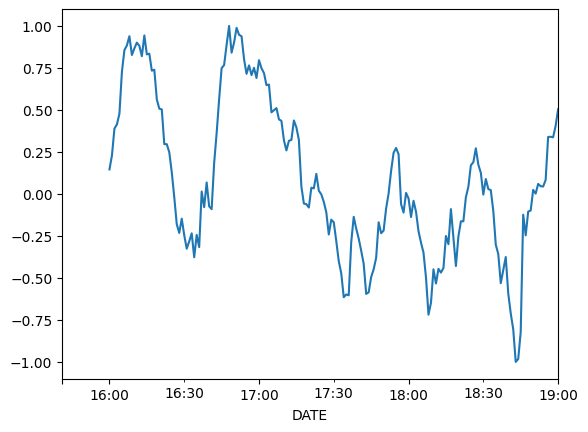

In [253]:
# Plot the chaikin money flow indicator chart
df_cmf = df_norm.FB_CMF_w20_norm
df_cmf.plot()

<AxesSubplot: xlabel='DATE'>

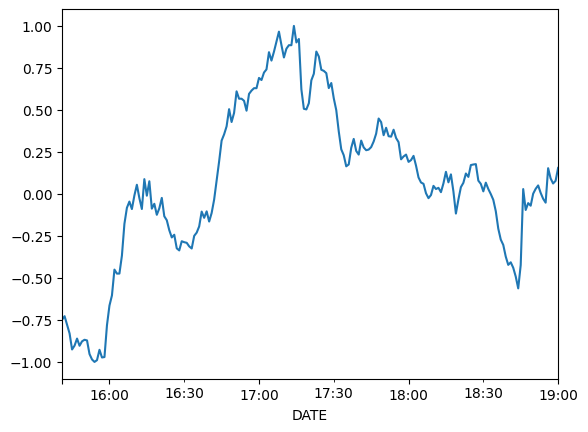

In [254]:
# Plot the accumulation distribution index chart
df_adi = df_norm.FB_ADI_norm
df_adi.plot()

<AxesSubplot: xlabel='DATE'>

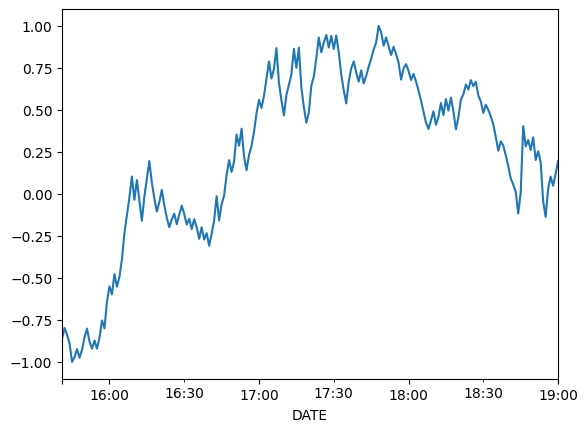

In [255]:
# Plot the on-balance volume chart
df_obv = df_norm.FB_OBV_norm
df_obv.plot()